In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#msg = pd.read_csv("data/msg.csv")
ses_1_42 = pd.read_csv("data/ses_1_42.csv")
ses_full = pd.read_csv("data/ses_full.csv")

In [4]:
#subsetting some invalid sessions without msg data
ses_full = ses_full[-ses_full.question_student_count.isnull()]
# lower case text
ses_full['text'] = ses_full.text.str.lower()

#suggested growth mindset phrases
gm_phrase = ['hard work', 'working hard',"you're so close", 'you are so close', 'nice effort', 'good job', \
             "you've got this", "you got this", "keep at it", "keep going", "keep trying", "almost there", "yet"]

#individually inputting phrases
for i, phrase in enumerate(gm_phrase):
    _ls_any = [1 if t.count(phrase)> 0 else 0 for t in msg.text_lower.astype(str)]
    msg['gp_' + str(i)] = _ls_any
    

ses_full = ses_full.merge(pd.DataFrame(msg[(msg.sent_from == 'tutor')].groupby('session_id')[msg.columns[-13:]].sum()).reset_index(), how = 'left', on = 'session_id')


#summing across rows and than a boolean for gp preasent
ses_full['gp_sum'] = ses_full[ses_full.columns[-13:]].sum(axis = 1)
ses_full.loc[ ses_full.gp_sum > 0 , 'gp_bool']  =  1
ses_full.loc[ ses_full.gp_sum == 0 , 'gp_bool']  =  0

In [7]:
ses_full[ses_full.session_count >4].groupby('student_id')['gb_bool'].mean().shape#.hist()#gp_bool.hist()

(1484,)

In [16]:
ses_full[ses_full.columns[-15:]]

,gp_0,gp_1,gp_2,gp_3,gp_4,gp_5,gp_6,gp_7,gp_8,gp_9,gp_10,gp_11,gp_12,gp_sum,gp_bool
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
ses_full.groupby("gp_bool")[ses_full.columns[-15:]].mean().T

gp_bool,0.0,1.0
gp_0,0.0,0.005522
gp_1,0.0,0.001354
gp_2,0.0,0.040633
gp_3,0.0,0.006043
gp_4,0.0,0.002813
gp_5,0.0,0.973640
gp_6,0.0,0.006147
gp_7,0.0,0.030423
gp_8,0.0,0.000625
gp_9,0.0,0.069702


In [20]:
ses_full.groupby('gp_bool')['session_id'].count()

gp_bool
0.0    24120
1.0     9598
Name: session_id, dtype: int64

In [30]:
ses_full[ses_full.gp_sum>=3]['gb_bool'].mean()

0.915053091817614

In [34]:
ses_full['gp_rate'] =  ses_full['gp_sum'] / ses_full['word_count'] 

In [42]:
ses_full.to_csv('data/ses_full.csv')

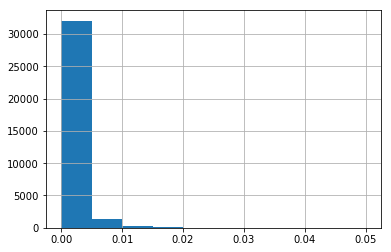

In [36]:
ses_full['gp_rate'].hist()

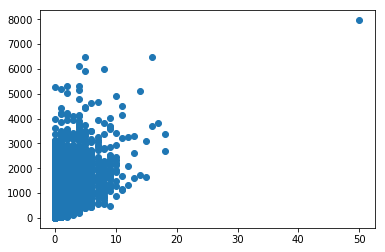

In [41]:
plt.scatter(ses_full['gp_sum'], ses_full['word_count'])

In [76]:
ses_full = pd.read_csv("data/ses_full.csv")

In [77]:
s_meta = pd.read_csv("data/student_user_table.csv")
s_meta = s_meta[['User Id', 'First Name']]
s_meta.columns = ['student_id' , 'first_name']
ses_full = ses_full.merge(s_meta, how = 'left', on = 'student_id')
ses_full_student = ses_full[-pd.isnull(ses_full.first_name)]

ses_full_student['first_name'] = ses_full_student.first_name.str.lower()
names = ses_full_student.first_name.values
text = ses_full_student.text.values
name_count = []
for tup in zip(names, text):
    name_count.append(tup[1].count(tup[0]))

ses_full_student['name_count'] = name_count
ses_full_student['name_rate'] = ses_full_student.name_count / ses_full_student.word_count

ses_full_student.to_csv("data/ses_full_student.csv")

In [110]:
ses_full_student.to_csv("data/ses_full_student.csv")

In [111]:
students = pd.read_csv('data/students.csv')

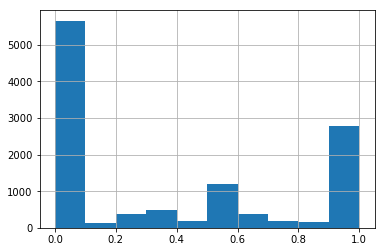

In [112]:
students.gb_rate.hist()